In [179]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import make_blobs
from inspect import signature as sig
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# <선형 알고리즘(회귀용모델/분류용모델)>

# 회귀용 선형 모델(3)
1. 선형 회귀

In [59]:
from sklearn.linear_model import LinearRegression

과소적합

In [60]:
print(mglearn.datasets.make_wave(n_samples=60))

(array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547],
       [-2.87649303],
       [ 2.81945911],
       [ 1.99465584],
       [-1.72596534],
       [-1.9090502 ],
       [-1.89957294],
       [-1.17454654],
       [ 0.14853859],
       [-0.40832989],
       [-1.25262516],
       [ 0.67111737],
       [-2.16303684],
       [-1.24713211],
       [-0.80182894],
       [-0.26358009],
       [ 1.71105577],
       [-1.80195731],
       [ 0.08540663],
       [ 0.55448741],
       [-2.72129752],
       [ 0.64526911],
       [-1.97685526],
       [-2.60969044],
       [ 2.69331322],
       [ 2.7937922 ],
       [ 1.85038409],
       [-1.17231738],
       [-2.41396732],
       [ 1.10539816],
       [-0.35908504],
       [-2.26777059],
       [-0.02893854],
       [-2.79366887],
       [ 2.45592241],
       [-1.44732011],
       [ 

In [33]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression()
lr = lr.fit(X_train, y_train)

In [34]:
print(lr.coef_)

[0.39390555]


In [35]:
print(lr.intercept_)

-0.03180434302675973


In [36]:
print("훈련 세트 결정계수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 결정계수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 결정계수: 0.67
테스트 세트 결정계수: 0.66


과대 적합

In [37]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [194]:
X_train.shape # --> 379개의 관측치, 104개의 피쳐
X.shape
y_test

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [38]:
print("훈련 세트 결정계수: {:.2f}".format(lr.score(X_train, y_train)))
print("테스트 세트 결정계수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 결정계수: 0.95
테스트 세트 결정계수: 0.61


2. 릿지회귀

In [40]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("훈련세트점수 : ", ridge.score(X_train, y_train))
print("테스트세트점수 : ", ridge.score(X_test, y_test))

훈련세트점수 :  0.8857966585170943
테스트세트점수 :  0.7527683481744755


In [67]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련세트점수 : ", ridge10.score(X_train, y_train))
print("테스트세트점수 : ", ridge10.score(X_test, y_test))

훈련세트점수 :  0.7882787115369615
테스트세트점수 :  0.6359411489177311


In [123]:
print(ridge10.coef_) # -> 피쳐가 104개이므로 가중치값도 104개이다
ridge10.coef_.shape

[-8.11609631e-01  6.47608896e-01 -8.09783229e-01  3.11334709e-01
 -6.84623747e-01  4.38797575e+00 -1.47554474e-01 -2.44214065e+00
  8.45915099e-01 -1.14727508e+00 -2.33162040e+00  1.06787015e+00
 -3.98391025e+00 -5.98636976e-01  2.93228193e-03 -5.21253823e-01
  1.40339673e-01 -6.45256057e-01 -7.61400539e-01 -7.47231171e-01
 -3.86298005e-02 -8.29808059e-01 -7.52859756e-01 -6.75605899e-01
 -8.72001488e-01 -3.23330640e-01  1.27336327e+00 -3.37279550e-01
  6.30682038e-02  2.37092897e-01  2.09805607e+00  1.00996768e-01
 -2.79529662e-01  1.73222619e-01 -3.33557850e-01 -3.74226653e-01
  6.98414808e-01 -6.96284918e-01  7.79521010e-01  3.74843210e-01
 -6.24101244e-01 -7.63657605e-01  4.35756439e-02 -1.04000852e+00
  4.24401576e-01  4.78687021e-01 -3.84125445e-01 -9.93802653e-02
 -1.30226356e+00  3.11334709e-01 -5.92097637e-01  6.33816542e-01
  6.66792895e-01 -1.27959944e-01  1.35346930e+00  1.09839246e+00
  6.37100148e-01  4.76402917e-01 -9.70121915e-01 -1.43819286e+00
 -6.91866218e-02 -9.29335

(104,)

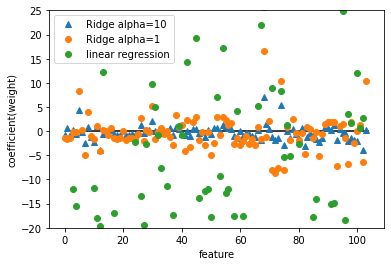

In [74]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 'o', label="Ridge alpha=1")
plt.plot(lr.coef_, 'o', label="linear regression")

plt.xlabel("feature")
plt.ylabel("coefficient(weight)")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-20,+25)
plt.legend()

3. 라쏘 회귀

# 분류용 선형 모델(2)

1. 로지스틱 회귀(이진분류와 다중분류 모두 가능!)

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [162]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression( max_iter =500, C=1 ).fit(X_train, y_train)
print("train data score: ", logreg.score(X_train, y_train))
print("train data score: ", logreg.score(X_test, y_test))

train data score:  0.9530516431924883
train data score:  0.958041958041958


In [163]:
logreg100 = LogisticRegression( max_iter =500, C=100 ).fit(X_train, y_train)
print("train data score: ", logreg.score(X_train, y_train))
print("train data score: ", logreg.score(X_test, y_test))

train data score:  0.9530516431924883
train data score:  0.958041958041958


In [164]:
logreg0001 = LogisticRegression( max_iter =500, C=0.001 ).fit(X_train, y_train)
print("train data score: ", logreg.score(X_train, y_train))
print("train data score: ", logreg.score(X_test, y_test))

train data score:  0.9530516431924883
train data score:  0.958041958041958


In [210]:
print(cancer.data.shape)
print(cancer.feature_names)
print(cancer.target)
print(logreg.coef_.shape) # --> 2차원 어레이에서는 속의 요소 어레이가 하나의 관측치 취급이 된다. 따라서 Transeverse해줘야!
print(logreg.coef_)
print(logreg.coef_.T.shape)
print(logreg.coef_.T)

(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0

In [ ]:
plt.plot(logreg.coef_, 'o', label= "C=1")
plt.plot(logreg100.coef_, '^', label= "C=100")

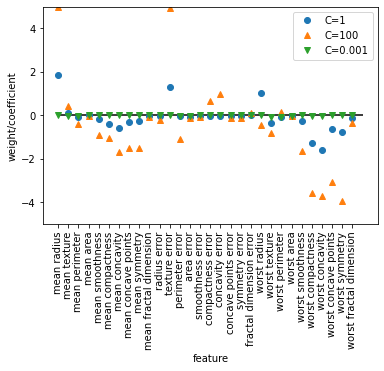

In [167]:
plt.plot(logreg.coef_.T, 'o', label= "C=1")
plt.plot(logreg100.coef_.T, '^', label= "C=100")
plt.plot(logreg0001.coef_.T, 'v', label= "C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation = 90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,+5)
plt.xlabel("feature")
plt.ylabel("weight/coefficient")
plt.legend()

L1 규제로 로지스틱 회귀 모델을 만드려고 했더니 안되네?

C= 1  :  o
prameter C = 1  train set accuracy score :  0.9530516431924883
prameter C = 1  test set accuracy score :  0.958041958041958
C= 100  :  ^
prameter C = 100  train set accuracy score :  0.9741784037558685
prameter C = 100  test set accuracy score :  0.965034965034965
C= 0.001  :  v
prameter C = 0.001  train set accuracy score :  0.9530516431924883
prameter C = 0.001  test set accuracy score :  0.9440559440559441


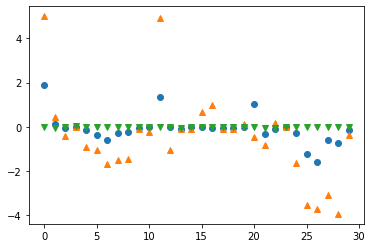

In [209]:
for c, marker in zip([1,100,0.001], ['o','^','v']):
    print("C=",c," : ",marker)
    lr_l1 = LogisticRegression(C=c, penalty="l2", max_iter = 500).fit(X_train, y_train)
    print("prameter C =",c," train set accuracy score : ", lr_l1.score(X_train, y_train))
    print("prameter C =",c," test set accuracy score : ", lr_l1.score(X_test, y_test))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.2f}".format(c))

2. 서포트 벡터 머신(기본적으로 이진분류만 지원하나 다중 클래스 분류를 할 수 있도록 확장 가능!)

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0])

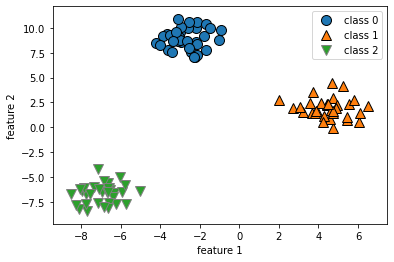

In [174]:
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state = 42, n_samples = 100)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend(["class 0", "class 1", "class 2"])
y

In [192]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC(C=0.0001).fit(X, y)
print(linear_svm.coef_)
print(linear_svm.intercept_)

[[-0.00814201  0.04991776]
 [ 0.06289914 -0.00878009]
 [-0.03011591 -0.05918335]]
[-0.00799206 -0.00429605 -0.00596865]


Text(0, 0.5, 'feature 1')

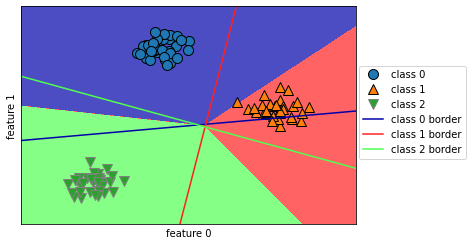

In [193]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors) :
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c=color)
plt.legend(['class 0','class 1', 'class 2', 'class 0 border', 'class 1 border', 'class 2 border'], loc=(1.01, 0.3))
plt.xlabel("feature 0")
plt.ylabel("feature 1")

In [208]:
X,y = make_blobs(random_state = 42, n_samples = 1000)
linear_svm.score(X, y)

0.997